In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import ipywidgets

__Exploring & cleaning the world Dataset__

In [2]:
df_world = pd.read_csv('world-data-2023.csv')
df_world.head(10)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",...,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",...,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",...,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


In [3]:
df_world.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [4]:
print("Columns in df_world:")
print(df_world.columns)

# Specify the columns you want to select
selected_columns = ['Country', 'Density\n(P/Km2)', 'Agricultural Land( %)',
                     'Land Area(Km2)', 'Capital/Major City', 'Forested Area (%)',
                     'Gasoline Price', 'GDP', 'Largest city', 'Physicians per thousand', 
                     'Population', 'Population: Labor force participation (%)',
                     'Urban_population', 'Latitude', 'Longitude']

# Try to select the columns
try:
    df_world_selected = df_world[selected_columns]
    print("Selected columns successfully.")
except KeyError as e:
    print(f"KeyError: {e}")

Columns in df_world:
Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')
Selected columns successfully.


In [5]:
#selecting useful columns
selected_columns = ['Country', 'Density\n(P/Km2)', 'Capital/Major City', 
                     'Gasoline Price', 'GDP', 'Largest city', 'Physicians per thousand', 
                     'Population', 'Population: Labor force participation (%)',
                     'Urban_population']

df_world = df_world[selected_columns]

df_world.head(10)


,Country,Density\n(P/Km2),Capital/Major City,Gasoline Price,GDP,Largest city,Physicians per thousand,Population,Population: Labor force participation (%),Urban_population
0,Afghanistan,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754",48.90%,"9,797,273"
1,Albania,105,Tirana,$1.36,"$15,278,077,447",Tirana,1.20,"2,854,191",55.70%,"1,747,593"
2,Algeria,18,Algiers,$0.28,"$169,988,236,398",Algiers,1.72,"43,053,054",41.20%,"31,510,100"
3,Andorra,164,Andorra la Vella,$1.51,"$3,154,057,987",Andorra la Vella,3.33,"77,142",NaN,"67,873"
4,Angola,26,Luanda,$0.97,"$94,635,415,870",Luanda,0.21,"31,825,295",77.50%,"21,061,025"
5,Antigua and Barbuda,223,"St. John's, Saint John",$0.99,"$1,727,759,259","St. John's, Saint John",2.76,"97,118",NaN,"23,800"
6,Argentina,17,Buenos Aires,$1.10,"$449,663,446,954",Buenos Aires,3.96,"44,938,712",61.30%,"41,339,571"
7,Armenia,104,Yerevan,$0.77,"$13,672,802,158",Yerevan,4.40,"2,957,731",55.60%,"1,869,848"
8,Australia,3,Canberra,$0.93,"$1,392,680,589,329",Sydney,3.68,"25,766,605",65.50%,"21,844,756"
9,Austria,109,Vienna,$1.20,"$446,314,739,528",Vienna,5.17,"8,877,067",60.70%,"5,194,416"


In [6]:
df_world.count()

Country                                      195
Density\n(P/Km2)                             195
Capital/Major City                           192
Gasoline Price                               175
GDP                                          193
Largest city                                 189
Physicians per thousand                      188
Population                                   194
Population: Labor force participation (%)    176
Urban_population                             190
dtype: int64

__Exploring & cleaning the Tourism Recipts Data__

In [7]:
df_tourism=pd.read_csv('tourism-recipts.csv')
df_tourism.rename(columns={'name':'Country','year':'Year','value_$':'Revenue'}, inplace=True)
df_tourism.head(10)


,Country,code,Year,Revenue
0,Afghanistan,AFG,2008,57000000.0
1,Afghanistan,AFG,2009,89000000.0
2,Afghanistan,AFG,2010,147000000.0
3,Afghanistan,AFG,2011,165000000.0
4,Afghanistan,AFG,2012,167000000.0
5,Afghanistan,AFG,2013,179000000.0
6,Afghanistan,AFG,2014,121000000.0
7,Afghanistan,AFG,2015,86000000.0
8,Afghanistan,AFG,2016,62000000.0
9,Afghanistan,AFG,2017,16000000.0


In [8]:
df_tourism.dtypes

Country     object
code        object
Year         int64
Revenue    float64
dtype: object

In [9]:
df_tourism.columns

Index(['Country', 'code', 'Year', 'Revenue'], dtype='object')

In [10]:
target_year=2011
years_included= 8
df_tourism=df_tourism[(df_tourism['Year']>=target_year)&(df_tourism['Year']< target_year+ years_included)]
df_tourism=df_tourism.drop('code', axis=1)
df_tourism.head()

,Country,Year,Revenue
3,Afghanistan,2011,165000000.0
4,Afghanistan,2012,167000000.0
5,Afghanistan,2013,179000000.0
6,Afghanistan,2014,121000000.0
7,Afghanistan,2015,86000000.0


In [11]:
df_tourism.count()

Country    1344
Year       1344
Revenue    1344
dtype: int64

In [12]:
df_world_tourism=pd.merge(df_world,df_tourism, on='Country',how='right')
#df_world_tourism =df_world_tourism('code', axis=1, inplace=True)
#df_world_tourism['Year']=df_world_tourism['Year'].astype(int)
#df_world_tourism.isna().sum()
df_world_tourism.head()

,Country,Density\n(P/Km2),Capital/Major City,Gasoline Price,GDP,Largest city,Physicians per thousand,Population,Population: Labor force participation (%),Urban_population,Year,Revenue
0,Afghanistan,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754",48.90%,"9,797,273",2011,165000000.0
1,Afghanistan,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754",48.90%,"9,797,273",2012,167000000.0
2,Afghanistan,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754",48.90%,"9,797,273",2013,179000000.0
3,Afghanistan,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754",48.90%,"9,797,273",2014,121000000.0
4,Afghanistan,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754",48.90%,"9,797,273",2015,86000000.0


In [13]:
df_world_tourism.count()

Country                                      1344
Density\n(P/Km2)                             1089
Capital/Major City                           1081
Gasoline Price                                998
GDP                                          1089
Largest city                                 1073
Physicians per thousand                      1061
Population                                   1089
Population: Labor force participation (%)    1009
Urban_population                             1065
Year                                         1344
Revenue                                      1344
dtype: int64

In [14]:
df_world_tourism.columns

Index(['Country', 'Density\n(P/Km2)', 'Capital/Major City', 'Gasoline Price',
       'GDP', 'Largest city', 'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Urban_population', 'Year',
       'Revenue'],
      dtype='object')

In [15]:
df_world_tourism['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia, Plurinational State of',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chile', 'Colombia', 'Comoros',
       'Congo', 'Congo, The Democratic Republic of the', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana'

__Exploring & Cleaning the Tourism arrival data__

In [16]:
df_tourism_arv=pd.read_csv('second_data/API_ST.INT.ARVL_DS2_en_csv_v2_1927083.csv')
df_tourism_arv.rename(columns={'Indicator Code':'IndicatorCode'},inplace=True)
#df_tourism_arv.rename(columns={'Country Name':'Country'}, inplace=True)
columns_kept=['Country Name','IndicatorCode','2011', '2012', '2013', '2014','2015','2016','2017','2018']
df_tourism_arv=df_tourism_arv[columns_kept]

df_tourism_arv.head()

,Country Name,IndicatorCode,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ST.INT.ARVL,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0,1070500.0,1082000.0
1,Afghanistan,ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,ST.INT.ARVL,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0,218000.0
3,Albania,ST.INT.ARVL,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0,5340000.0
4,Andorra,ST.INT.ARVL,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2819000.0,3003000.0,3042000.0


In [17]:
df_tourism_arv.rename(columns={'Country Name':'Country'}, inplace=True)
df_tourism_arv

,Country,IndicatorCode,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ST.INT.ARVL,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0,1070500.0,1082000.0
1,Afghanistan,ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,ST.INT.ARVL,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0,218000.0
3,Albania,ST.INT.ARVL,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0,5340000.0
4,Andorra,ST.INT.ARVL,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2819000.0,3003000.0,3042000.0
...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",ST.INT.ARVL,829000.0,874000.0,990000.0,1017500.0,366700.0,NaN,NaN,NaN
261,South Africa,ST.INT.ARVL,8339000.0,9188000.0,9537000.0,9549000.0,8904000.0,10044000.0,10285000.0,10472000.0
262,Zambia,ST.INT.ARVL,920000.0,859000.0,915000.0,947000.0,932000.0,956000.0,1083000.0,1072000.0


In [18]:
df_pivoted = df_tourism_arv.pivot(index='Country', columns='IndicatorCode', values=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

# Flatten the MultiIndex columns
df_pivoted.columns = ['_'.join(map(str, col)) for col in df_pivoted.columns]

# Reset the index
df_pivoted.reset_index(inplace=True)

# Melt the DataFrame to have 'Year' as a column
df_tourism_arv = pd.melt(df_pivoted, id_vars=['Country'], var_name='Year_Indicator', value_name='ST.INT.ARVL')

# Extract 'Year' and 'Indicator' from 'Year_Indicator'
df_tourism_arv[['Year', 'Indicator']] = df_tourism_arv['Year_Indicator'].str.split('_', expand=True)

# Drop unnecessary columns
df_tourism_arv = df_tourism_arv[['Country', 'Year', 'ST.INT.ARVL']]
df_tourism_arv=df_tourism_arv.sort_values(by=['Country','Year'],ascending=True)
df_tourism_arv

,Country,Year,ST.INT.ARVL
0,Afghanistan,2011,NaN
264,Afghanistan,2012,NaN
528,Afghanistan,2013,NaN
792,Afghanistan,2014,NaN
1056,Afghanistan,2015,NaN
...,...,...,...
1055,Zimbabwe,2014,1880000.0
1319,Zimbabwe,2015,2057000.0
1583,Zimbabwe,2016,2168000.0
1847,Zimbabwe,2017,2423000.0


In [19]:
df_tourism_arv.describe()

,ST.INT.ARVL
count,1.872000e+03
mean,4.511365e+07
std,1.389022e+08
min,1.100000e+03
25%,4.550000e+05
50%,2.370000e+06
75%,1.619750e+07
max,1.441953e+09


In [20]:
df_tourism_arv.isna().sum()


Country          0
Year             0
ST.INT.ARVL    240
dtype: int64

__Exploring & Cleaning the tourism data expanditure per country__

In [21]:
df_tourism_ex=pd.read_csv('second_data/API_ST.INT.XPND.CD_DS2_en_csv_v2_1929314.csv')
columns_kept2=['Country Name','Indicator Code','2011', '2012', '2013', '2014','2015','2016','2017','2018'] 
df_tourism_arv.rename(columns={'Indicator Code':'IndicatorCode'},inplace=True)
df_tourism_ex=df_tourism_ex[columns_kept2]
df_tourism_ex.head()

,Country Name,Indicator Code,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ST.INT.XPND.CD,2.870000e+08,2.940000e+08,3.420000e+08,3.510000e+08,3.590000e+08,3.320000e+08,3.620000e+08,3.580000e+08
1,Afghanistan,ST.INT.XPND.CD,2.550000e+08,1.100000e+08,1.380000e+08,1.400000e+08,1.510000e+08,8.900000e+07,1.300000e+08,2.260000e+08
2,Angola,ST.INT.XPND.CD,3.230000e+08,2.880000e+08,3.160000e+08,5.050000e+08,3.890000e+08,8.230000e+08,1.216000e+09,7.620000e+08
3,Albania,ST.INT.XPND.CD,1.677000e+09,1.374000e+09,1.567000e+09,1.689000e+09,1.311000e+09,1.338000e+09,1.473000e+09,1.750000e+09
4,Andorra,ST.INT.XPND.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_tourism_ex.rename(columns={'Country Name':'Country'}, inplace = True)
df_tourism_ex

,Country,Indicator Code,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ST.INT.XPND.CD,2.870000e+08,2.940000e+08,3.420000e+08,3.510000e+08,3.590000e+08,3.320000e+08,3.620000e+08,3.580000e+08
1,Afghanistan,ST.INT.XPND.CD,2.550000e+08,1.100000e+08,1.380000e+08,1.400000e+08,1.510000e+08,8.900000e+07,1.300000e+08,2.260000e+08
2,Angola,ST.INT.XPND.CD,3.230000e+08,2.880000e+08,3.160000e+08,5.050000e+08,3.890000e+08,8.230000e+08,1.216000e+09,7.620000e+08
3,Albania,ST.INT.XPND.CD,1.677000e+09,1.374000e+09,1.567000e+09,1.689000e+09,1.311000e+09,1.338000e+09,1.473000e+09,1.750000e+09
4,Andorra,ST.INT.XPND.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,ST.INT.XPND.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",ST.INT.XPND.CD,2.580000e+08,1.480000e+08,1.610000e+08,1.580000e+08,7.900000e+07,5.600000e+07,NaN,NaN
261,South Africa,ST.INT.XPND.CD,8.397000e+09,7.145000e+09,6.491000e+09,6.314000e+09,5.734000e+09,5.354000e+09,6.068000e+09,6.348000e+09
262,Zambia,ST.INT.XPND.CD,2.230000e+08,3.030000e+08,3.570000e+08,3.780000e+08,4.000000e+08,4.230000e+08,4.100000e+08,4.780000e+08


In [23]:
df_ex_pv=df_tourism_ex.pivot(index='Country' ,columns='Indicator Code', values=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
df_ex_pv.columns =['_'.join(map(str,col))for col in df_ex_pv.columns]
df_ex_pv.reset_index(inplace=True)
df_melted= pd.melt(df_ex_pv,id_vars=['Country'], var_name='Year_Indicator', value_name='ST.INT.XPND.CD')
df_melted[['Year', 'Indicator']] = df_melted['Year_Indicator'].str.split('_', expand=True)
df_ex_pv=df_melted[['Country','Year','ST.INT.XPND.CD']]
df_ex_pv=df_ex_pv.sort_values(by=['Country','Year'])
df_ex_pv

,Country,Year,ST.INT.XPND.CD
0,Afghanistan,2011,255000000.0
264,Afghanistan,2012,110000000.0
528,Afghanistan,2013,138000000.0
792,Afghanistan,2014,140000000.0
1056,Afghanistan,2015,151000000.0
...,...,...,...
1055,Zimbabwe,2014,451000000.0
1319,Zimbabwe,2015,557000000.0
1583,Zimbabwe,2016,406000000.0
1847,Zimbabwe,2017,338000000.0


In [24]:
df_tourism_ex.describe()

,2011,2012,2013,2014,2015,2016,2017,2018
count,2.350000e+02,2.360000e+02,2.340000e+02,2.340000e+02,2.330000e+02,2.350000e+02,2.260000e+02,2.100000e+02
mean,3.774445e+10,3.993914e+10,4.365894e+10,5.003158e+10,4.839694e+10,4.820004e+10,5.448673e+10,6.252279e+10
std,1.252603e+11,1.301144e+11,1.395600e+11,1.579005e+11,1.518090e+11,1.532592e+11,1.689065e+11,1.873320e+11
min,1.350000e+06,1.900000e+06,2.400000e+06,2.200000e+06,2.500000e+06,2.100000e+06,3.900000e+06,4.200000e+06
25%,2.420000e+08,2.320000e+08,2.377500e+08,2.775000e+08,2.730000e+08,2.830000e+08,3.200000e+08,4.031269e+08
50%,1.026000e+09,1.069500e+09,1.272000e+09,1.334000e+09,1.311000e+09,1.351000e+09,1.565000e+09,2.350000e+09
75%,1.534476e+10,1.515275e+10,1.637175e+10,1.785500e+10,1.663700e+10,1.679500e+10,1.997400e+10,2.456675e+10
max,1.105161e+12,1.160710e+12,1.239654e+12,1.393533e+12,1.339377e+12,1.356643e+12,1.471240e+12,1.575316e+12


In [25]:
df_tourism_ex.isna().sum()

Country            0
Indicator Code     0
2011              29
2012              28
2013              30
2014              30
2015              31
2016              29
2017              38
2018              54
dtype: int64

In [26]:
df_ex_arv= pd.merge(df_ex_pv,df_tourism_arv, on=['Country','Year'])


In [27]:
df_ex_arv.count()

Country           2112
Year              2112
ST.INT.XPND.CD    1843
ST.INT.ARVL       1872
dtype: int64

In [28]:
df_ex_arv['Year']=pd.to_datetime(df_ex_arv['Year'], format='%Y')
df_ex_arv['Year']=df_ex_arv['Year'].dt.year
#df_ex_arv.dtypes
df_ex_arv.head()

,Country,Year,ST.INT.XPND.CD,ST.INT.ARVL
0,Afghanistan,2011,255000000.0,NaN
1,Afghanistan,2012,110000000.0,NaN
2,Afghanistan,2013,138000000.0,NaN
3,Afghanistan,2014,140000000.0,NaN
4,Afghanistan,2015,151000000.0,NaN


In [29]:
df_ex_arv.count()

Country           2112
Year              2112
ST.INT.XPND.CD    1843
ST.INT.ARVL       1872
dtype: int64

In [30]:
df= pd.merge(df_ex_arv,df_world_tourism, on=['Country','Year'], how='right')
df.head()

,Country,Year,ST.INT.XPND.CD,ST.INT.ARVL,Density\n(P/Km2),Capital/Major City,Gasoline Price,GDP,Largest city,Physicians per thousand,Population,Population: Labor force participation (%),Urban_population,Revenue
0,Afghanistan,2011,255000000.0,NaN,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754",48.90%,"9,797,273",165000000.0
1,Afghanistan,2012,110000000.0,NaN,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754",48.90%,"9,797,273",167000000.0
2,Afghanistan,2013,138000000.0,NaN,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754",48.90%,"9,797,273",179000000.0
3,Afghanistan,2014,140000000.0,NaN,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754",48.90%,"9,797,273",121000000.0
4,Afghanistan,2015,151000000.0,NaN,60,Kabul,$0.70,"$19,101,353,833",Kabul,0.28,"38,041,754",48.90%,"9,797,273",86000000.0


In [31]:
df.columns

Index(['Country', 'Year', 'ST.INT.XPND.CD', 'ST.INT.ARVL', 'Density\n(P/Km2)',
       'Capital/Major City', 'Gasoline Price', 'GDP', 'Largest city',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Urban_population',
       'Revenue'],
      dtype='object')

In [32]:
df.dtypes


Country                                       object
Year                                           int64
ST.INT.XPND.CD                               float64
ST.INT.ARVL                                  float64
Density\n(P/Km2)                              object
Capital/Major City                            object
Gasoline Price                                object
GDP                                           object
Largest city                                  object
Physicians per thousand                      float64
Population                                    object
Population: Labor force participation (%)     object
Urban_population                              object
Revenue                                      float64
dtype: object

In [33]:
selected_columns = ['Density\n(P/Km2)', 'Gasoline Price', 'GDP', 'Physicians per thousand', 'Population','Population: Labor force participation (%)']

for col in selected_columns:
    df[col]=pd.to_numeric(df[col].replace('[\$,]', '', regex=True), errors='coerce')
#df = df[selected_columns].replace('[\$,]', '', regex=True).astype(float)
df.dtypes

Country                                       object
Year                                           int64
ST.INT.XPND.CD                               float64
ST.INT.ARVL                                  float64
Density\n(P/Km2)                             float64
Capital/Major City                            object
Gasoline Price                               float64
GDP                                          float64
Largest city                                  object
Physicians per thousand                      float64
Population                                   float64
Population: Labor force participation (%)    float64
Urban_population                              object
Revenue                                      float64
dtype: object

In [34]:
#checking missing values
df.isna().sum()

Country                                         0
Year                                            0
ST.INT.XPND.CD                                235
ST.INT.ARVL                                   280
Density\n(P/Km2)                              255
Capital/Major City                            263
Gasoline Price                                346
GDP                                           255
Largest city                                  271
Physicians per thousand                       283
Population                                    255
Population: Labor force participation (%)    1344
Urban_population                              279
Revenue                                         0
dtype: int64

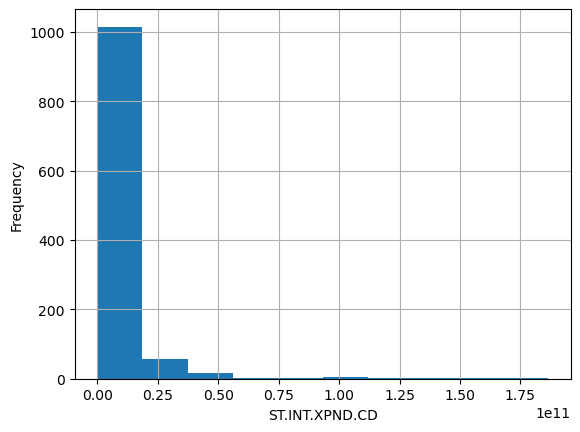

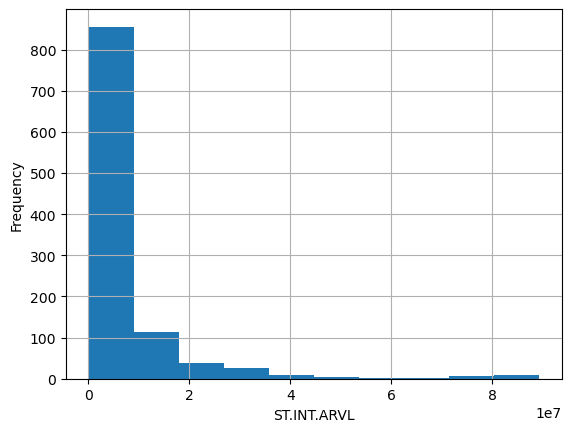

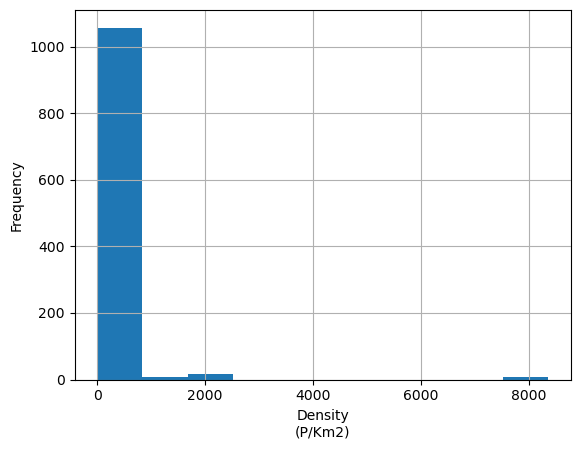

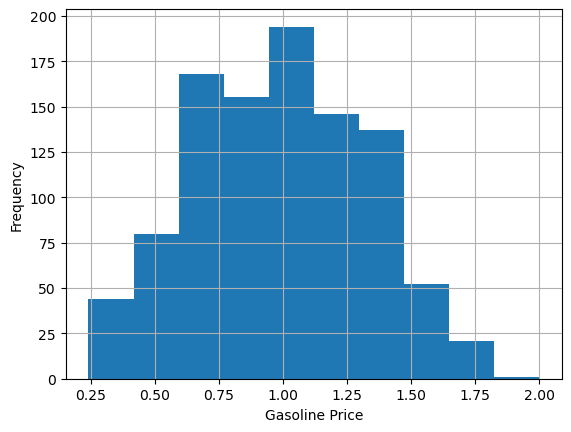

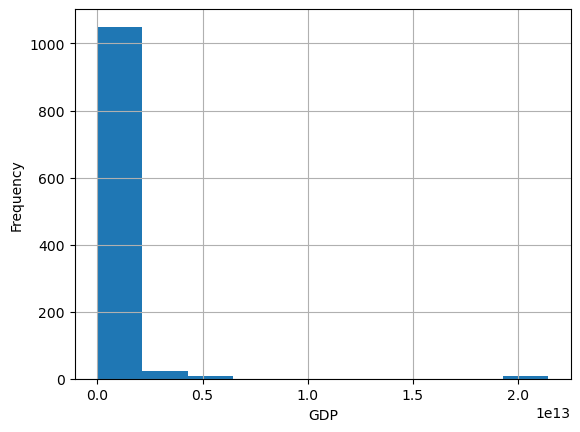

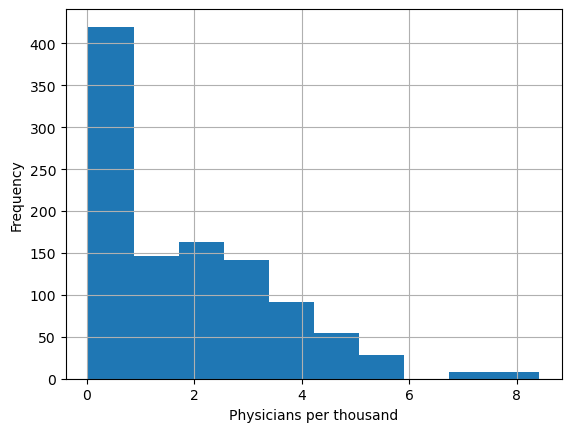

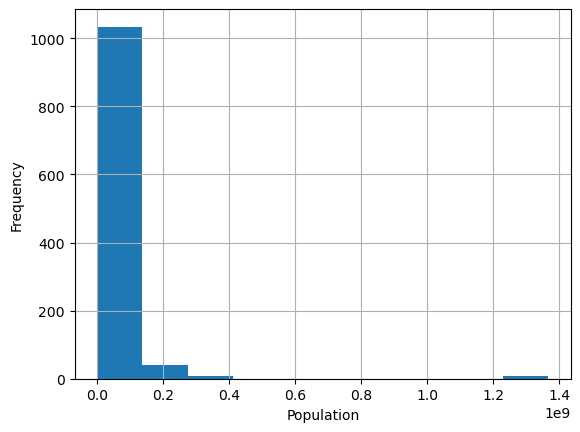

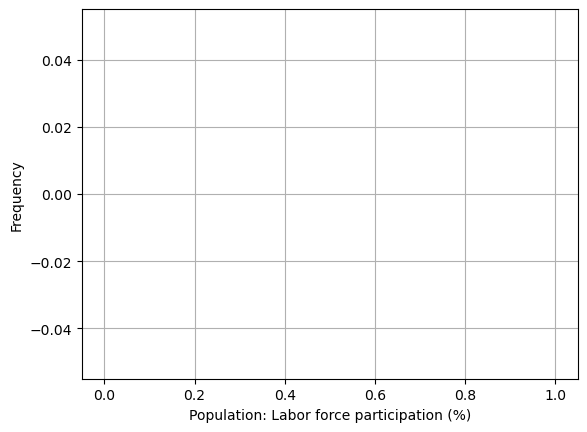

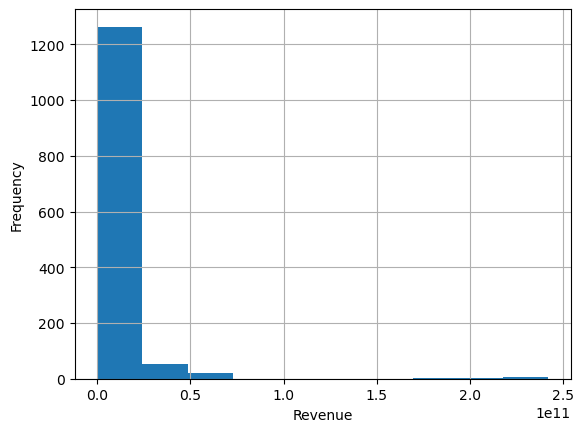

In [35]:
for i in df.select_dtypes(np.float64).columns:
    df[i].plot.hist(grid=True)
    plt.xlabel(i)
    plt.show()
    plt.close()

In [36]:
df_cities=pd.read_csv('worldcities.csv')
df_cities=df_cities[['city','country','population']]
df_cities.rename(columns={'city':'Capital/Major City','country':'Country','population':'City Population'},inplace=True)
df_cities.head()

,Capital/Major City,Country,City Population
0,Tokyo,Japan,37732000.0
1,Jakarta,Indonesia,33756000.0
2,Delhi,India,32226000.0
3,Guangzhou,China,26940000.0
4,Mumbai,India,24973000.0


In [37]:
df=pd.merge(df,df_cities,on=['Country','Capital/Major City'], how='inner')
df=df.drop('Population: Labor force participation (%)',axis=1)
df

,Country,Year,ST.INT.XPND.CD,ST.INT.ARVL,Density\n(P/Km2),Capital/Major City,Gasoline Price,GDP,Largest city,Physicians per thousand,Population,Urban_population,Revenue,City Population
0,Afghanistan,2011,255000000.0,NaN,60.0,Kabul,0.70,1.910135e+10,Kabul,0.28,38041754.0,"9,797,273",165000000.0,4273156.0
1,Afghanistan,2012,110000000.0,NaN,60.0,Kabul,0.70,1.910135e+10,Kabul,0.28,38041754.0,"9,797,273",167000000.0,4273156.0
2,Afghanistan,2013,138000000.0,NaN,60.0,Kabul,0.70,1.910135e+10,Kabul,0.28,38041754.0,"9,797,273",179000000.0,4273156.0
3,Afghanistan,2014,140000000.0,NaN,60.0,Kabul,0.70,1.910135e+10,Kabul,0.28,38041754.0,"9,797,273",121000000.0,4273156.0
4,Afghanistan,2015,151000000.0,NaN,60.0,Kabul,0.70,1.910135e+10,Kabul,0.28,38041754.0,"9,797,273",86000000.0,4273156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,Zimbabwe,2014,451000000.0,1880000.0,38.0,Harare,1.34,2.144076e+10,Harare,0.21,14645468.0,"4,717,305",186000000.0,2150000.0
903,Zimbabwe,2015,557000000.0,2057000.0,38.0,Harare,1.34,2.144076e+10,Harare,0.21,14645468.0,"4,717,305",191000000.0,2150000.0
904,Zimbabwe,2016,406000000.0,2168000.0,38.0,Harare,1.34,2.144076e+10,Harare,0.21,14645468.0,"4,717,305",194000000.0,2150000.0
905,Zimbabwe,2017,338000000.0,2423000.0,38.0,Harare,1.34,2.144076e+10,Harare,0.21,14645468.0,"4,717,305",158000000.0,2150000.0


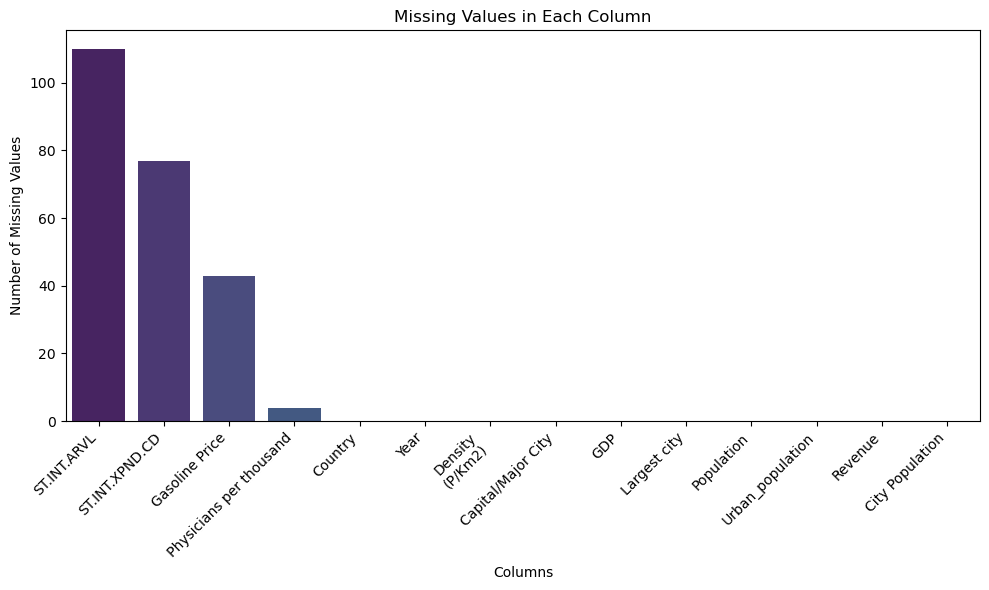

In [38]:
missing_values = df.isna().sum().sort_values(ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values, palette='viridis')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

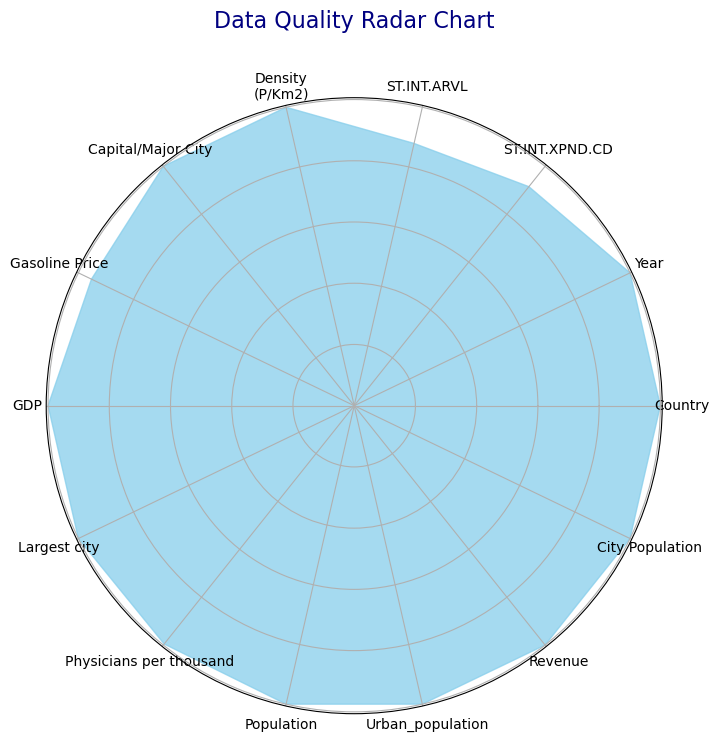

In [39]:

completeness_percentage = 100 * (1 - df.isnull().sum() / len(df))


categories = list(completeness_percentage.index)
values = completeness_percentage.values


angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))  # Closing the circle
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.75)

ax.set_yticklabels([])  
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Data Quality Radar Chart', size=16, color='navy', y=1.1)
plt.show()

In [40]:
df.isna().sum()

Country                      0
Year                         0
ST.INT.XPND.CD              77
ST.INT.ARVL                110
Density\n(P/Km2)             0
Capital/Major City           0
Gasoline Price              43
GDP                          0
Largest city                 0
Physicians per thousand      4
Population                   0
Urban_population             0
Revenue                      0
City Population              0
dtype: int64

In [41]:

df_missing=df[df['ST.INT.XPND.CD'].isna()]
df_missing

,Country,Year,ST.INT.XPND.CD,ST.INT.ARVL,Density\n(P/Km2),Capital/Major City,Gasoline Price,GDP,Largest city,Physicians per thousand,Population,Urban_population,Revenue,City Population
23,Algeria,2018,NaN,2657000.0,18.0,Algiers,0.28,1.699882e+11,Algiers,1.72,43053054.0,"31,510,100",1.965000e+08,3415811.0
87,Barbados,2014,NaN,521000.0,668.0,Bridgetown,1.81,5.209000e+09,Bridgetown,2.48,287025.0,"89,431",9.100000e+08,110000.0
88,Barbados,2015,NaN,592000.0,668.0,Bridgetown,1.81,5.209000e+09,Bridgetown,2.48,287025.0,"89,431",9.740000e+08,110000.0
89,Barbados,2016,NaN,632000.0,668.0,Bridgetown,1.81,5.209000e+09,Bridgetown,2.48,287025.0,"89,431",1.071000e+09,110000.0
105,Benin,2018,NaN,295000.0,108.0,Porto-Novo,0.72,1.439071e+10,Cotonou,0.08,11801151.0,"5,648,149",1.750000e+08,300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Yemen,2013,NaN,NaN,56.0,Sanaa,0.92,2.691440e+10,Sanaa,0.31,29161922.0,"10,869,523",1.097000e+09,2957000.0
896,Yemen,2014,NaN,NaN,56.0,Sanaa,0.92,2.691440e+10,Sanaa,0.31,29161922.0,"10,869,523",1.199000e+09,2957000.0
897,Yemen,2015,NaN,NaN,56.0,Sanaa,0.92,2.691440e+10,Sanaa,0.31,29161922.0,"10,869,523",1.160000e+08,2957000.0
898,Yemen,2016,NaN,NaN,56.0,Sanaa,0.92,2.691440e+10,Sanaa,0.31,29161922.0,"10,869,523",1.160000e+08,2957000.0


In [42]:
df_missing['Country'].unique()

array(['Algeria', 'Barbados', 'Benin', 'Burkina Faso', 'Cuba', 'Egypt',
       'Eritrea', 'Gabon', 'Kenya', 'Kyrgyzstan', 'Mali', 'Niger',
       'Papua New Guinea', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Senegal', 'Slovakia',
       'Tajikistan', 'Uzbekistan', 'Yemen', 'Zimbabwe'], dtype=object)

In [43]:
df['ST.INT.XPND.CD'].fillna(df.groupby('Country')['ST.INT.XPND.CD'].transform('mean'), inplace=True)
df['ST.INT.ARVL'].fillna(df.groupby('Country')['ST.INT.XPND.CD'].transform('mean'), inplace=True)


In [44]:
df.isna().sum()

Country                     0
Year                        0
ST.INT.XPND.CD             60
ST.INT.ARVL                51
Density\n(P/Km2)            0
Capital/Major City          0
Gasoline Price             43
GDP                         0
Largest city                0
Physicians per thousand     4
Population                  0
Urban_population            0
Revenue                     0
City Population             0
dtype: int64

In [45]:
df_modified = df.copy()
countries=df_missing['Country'].unique()
for country in countries:
    count_missing_arv = df[df['Country']== country]['ST.INT.ARVL'].isna().sum()
    count_missing_ex = df[df['Country']== country]['ST.INT.XPND.CD'].isna().sum()
    if count_missing_arv == count_missing_ex:
        # Drop rows with missing values in both columns
        df_modified = df_modified.dropna(subset=['ST.INT.ARVL', 'ST.INT.XPND.CD'])
    else:
        print(f'Country {country} has {count_missing_arv} arrival values and {count_missing_ex} expenditure values')
   

Country Cuba has 0 arrival values and 8 expenditure values
Country Eritrea has 0 arrival values and 1 expenditure values


In [46]:
df_modified['Gasoline Price'].fillna(df_modified.groupby('Year')['Gasoline Price'].transform('mean'), inplace=True)
df_modified.drop(columns='Physicians per thousand',axis=1,inplace=True)
df_modified[df_modified['Gasoline Price'].isna()]

,Country,Year,ST.INT.XPND.CD,ST.INT.ARVL,Density\n(P/Km2),Capital/Major City,Gasoline Price,GDP,Largest city,Population,Urban_population,Revenue,City Population


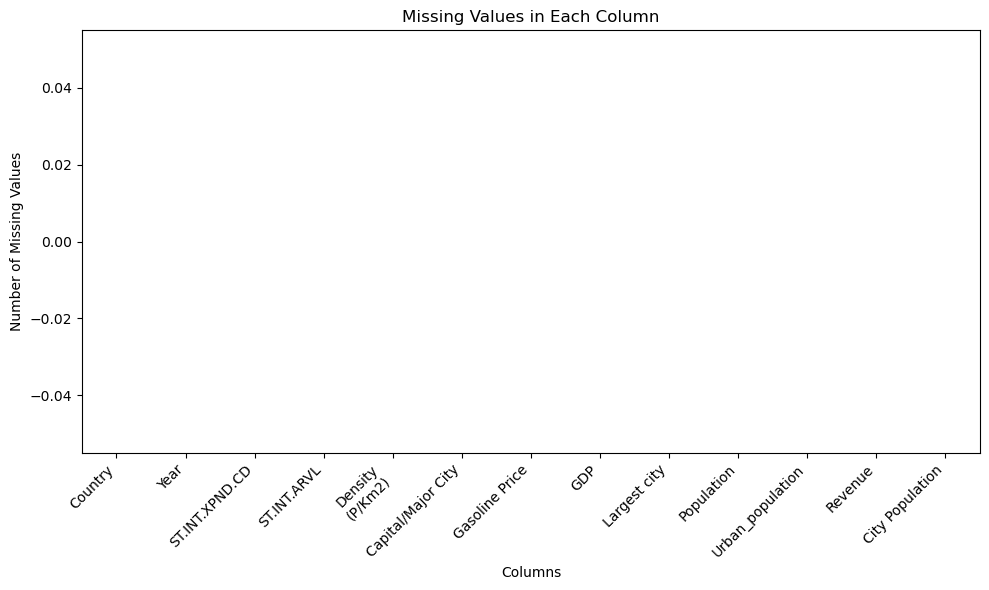

In [47]:
missing_values = df_modified.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values, palette='viridis')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [48]:
df_modified.isna().sum()

Country               0
Year                  0
ST.INT.XPND.CD        0
ST.INT.ARVL           0
Density\n(P/Km2)      0
Capital/Major City    0
Gasoline Price        0
GDP                   0
Largest city          0
Population            0
Urban_population      0
Revenue               0
City Population       0
dtype: int64

In [49]:
duplicates_all_columns = df_ex_arv.duplicated().sum()
duplicates_all_columns

0

In [50]:
def creating_box_hist(column, df):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_dis) = plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.20, .80)},figsize=(8, 5))
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode().tolist()[0]

    f.suptitle("Data distribution of  "+ column  , fontsize=10, fontweight='bold')
    # assigning a graph to each ax

    sns.boxplot(df[column], ax=ax_box,orient = 'h',showmeans = True)

    sns.despine(top=True,right=True,left=True)
    sns.histplot(df[column],kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

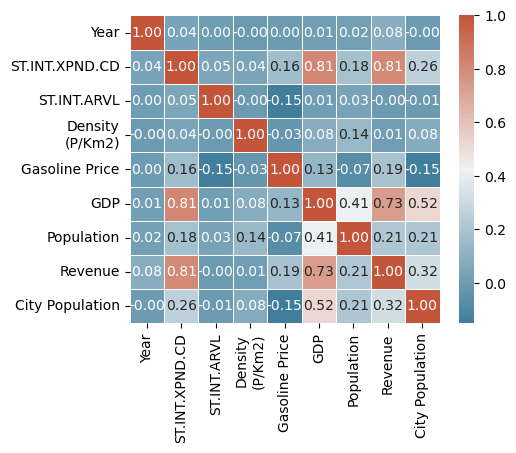

In [51]:
numerical_columns = df_modified.select_dtypes(include=['float64', 'int64']).columns
cor = df[numerical_columns].corr()
plt.figure(figsize=(5,4))
#cor=df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor,annot=True,cmap=cmap ,fmt=".2f", linewidths=.5)
plt.show()

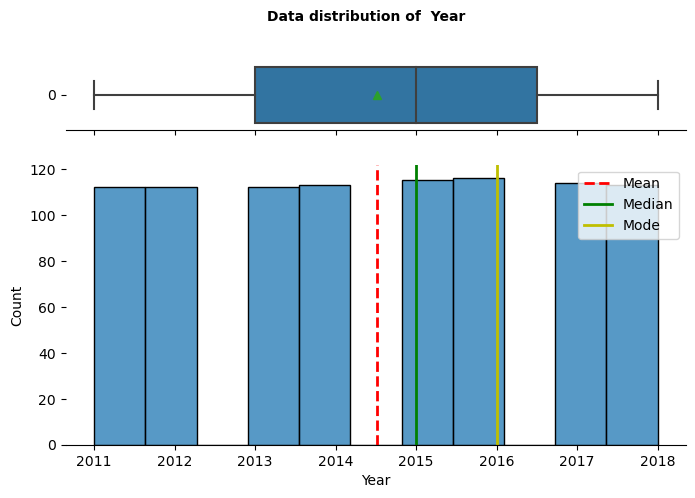

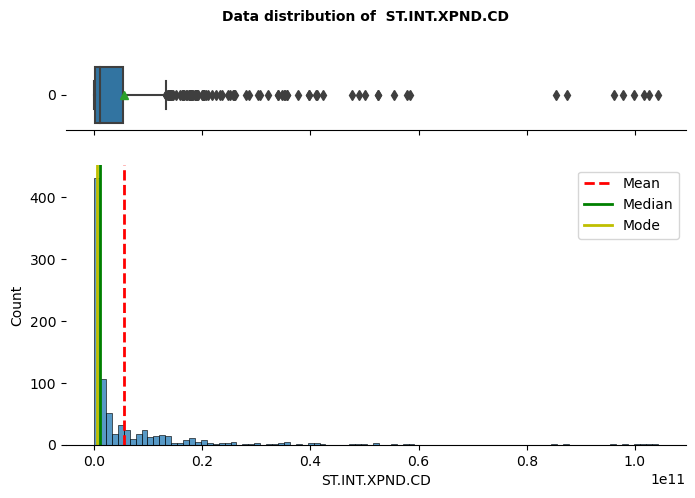

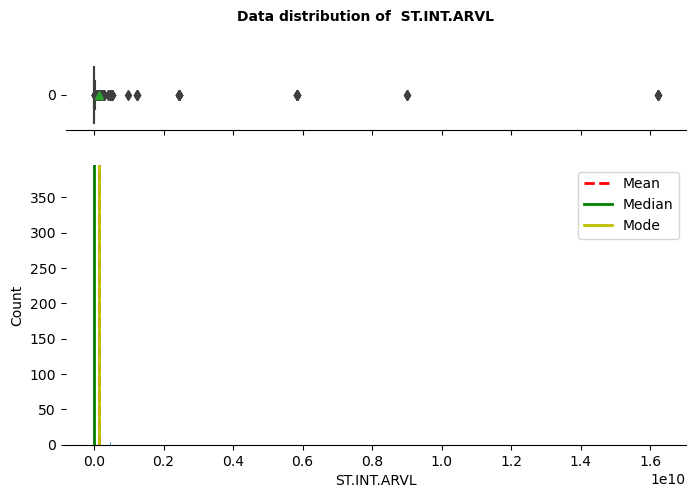

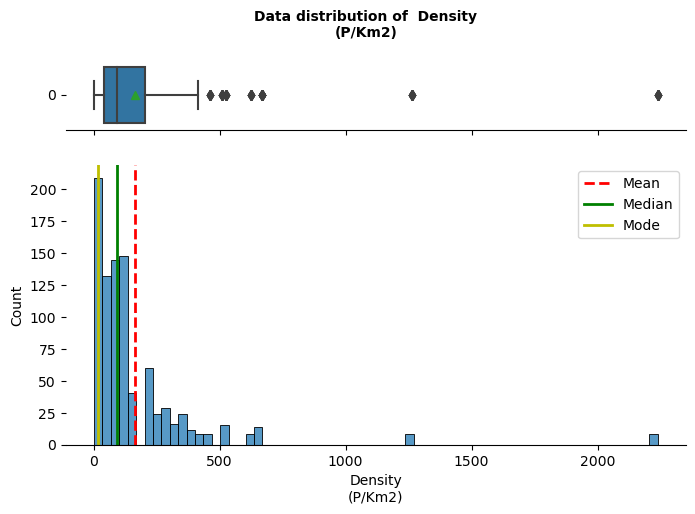

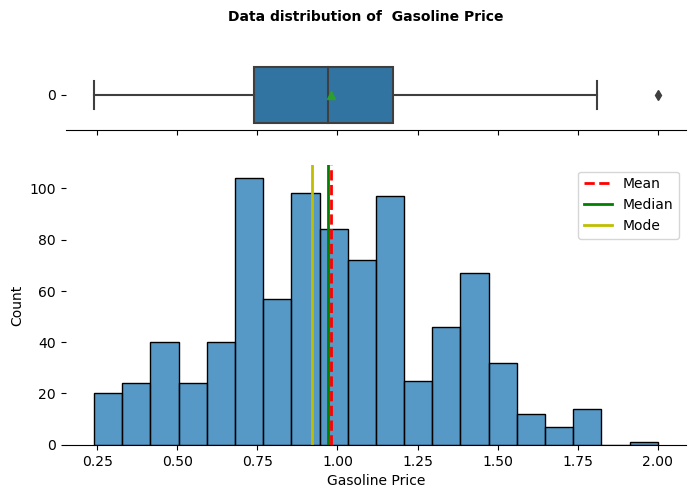

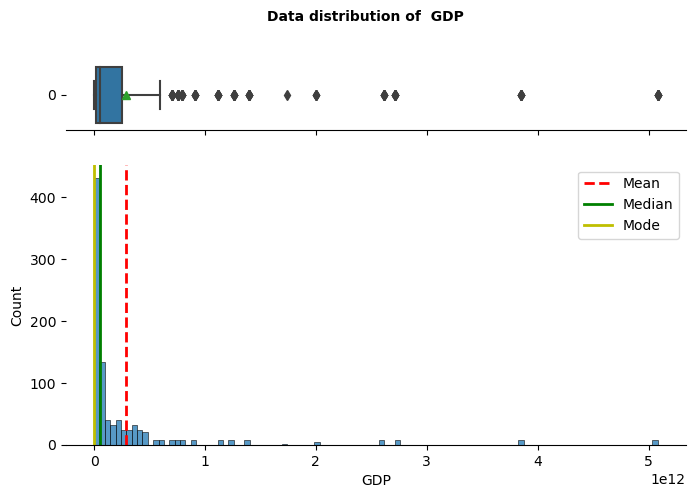

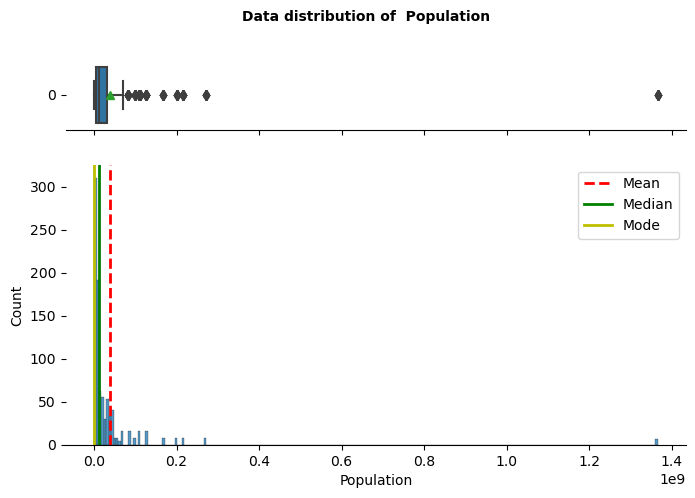

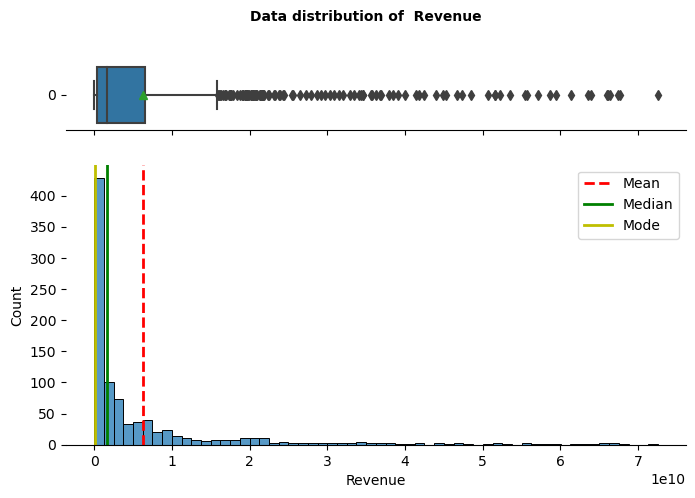

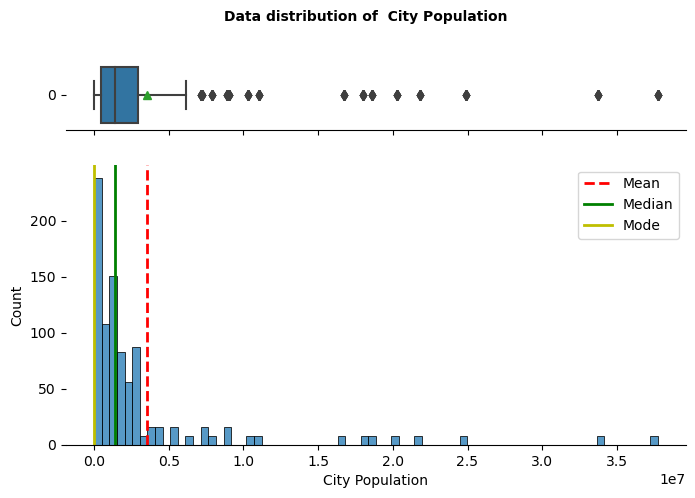

In [52]:
for i in numerical_columns:
    creating_box_hist(i,df)

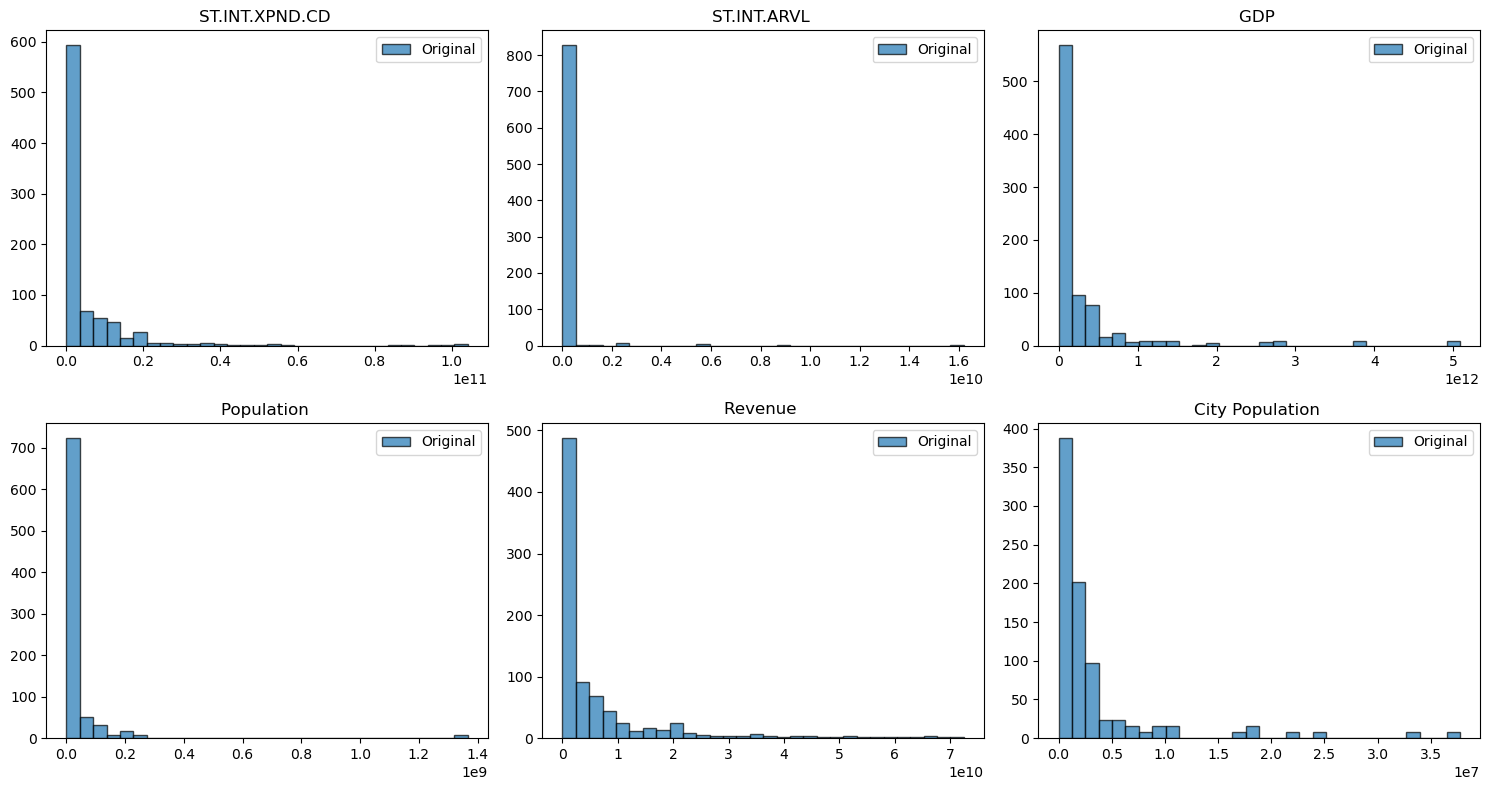

In [53]:
column_names=['ST.INT.XPND.CD','ST.INT.ARVL','GDP','Population','Revenue','City Population']
plt.figure(figsize=(15, 8))
for i, column_name in enumerate(column_names):
    plt.subplot(2, 3, i + 1)
    plt.hist(df_modified[column_name], bins=30, edgecolor='k', alpha=0.7, label='Original')
    plt.title(f'{column_name} ')
    plt.legend()

plt.tight_layout()
plt.show()

In [54]:

for column_name in column_names:
    # Check if the data contains non-positive values
    if any(df_modified[column_name] <= 0):
        # Shift the data by a small positive constant to make it positive
        df_modified[column_name] = df_modified[column_name] + np.abs(df_modified[column_name].min()) + 1

    # Perform Logarithmic transformation
    df_modified[column_name + '_log'] = np.log(df_modified[column_name])


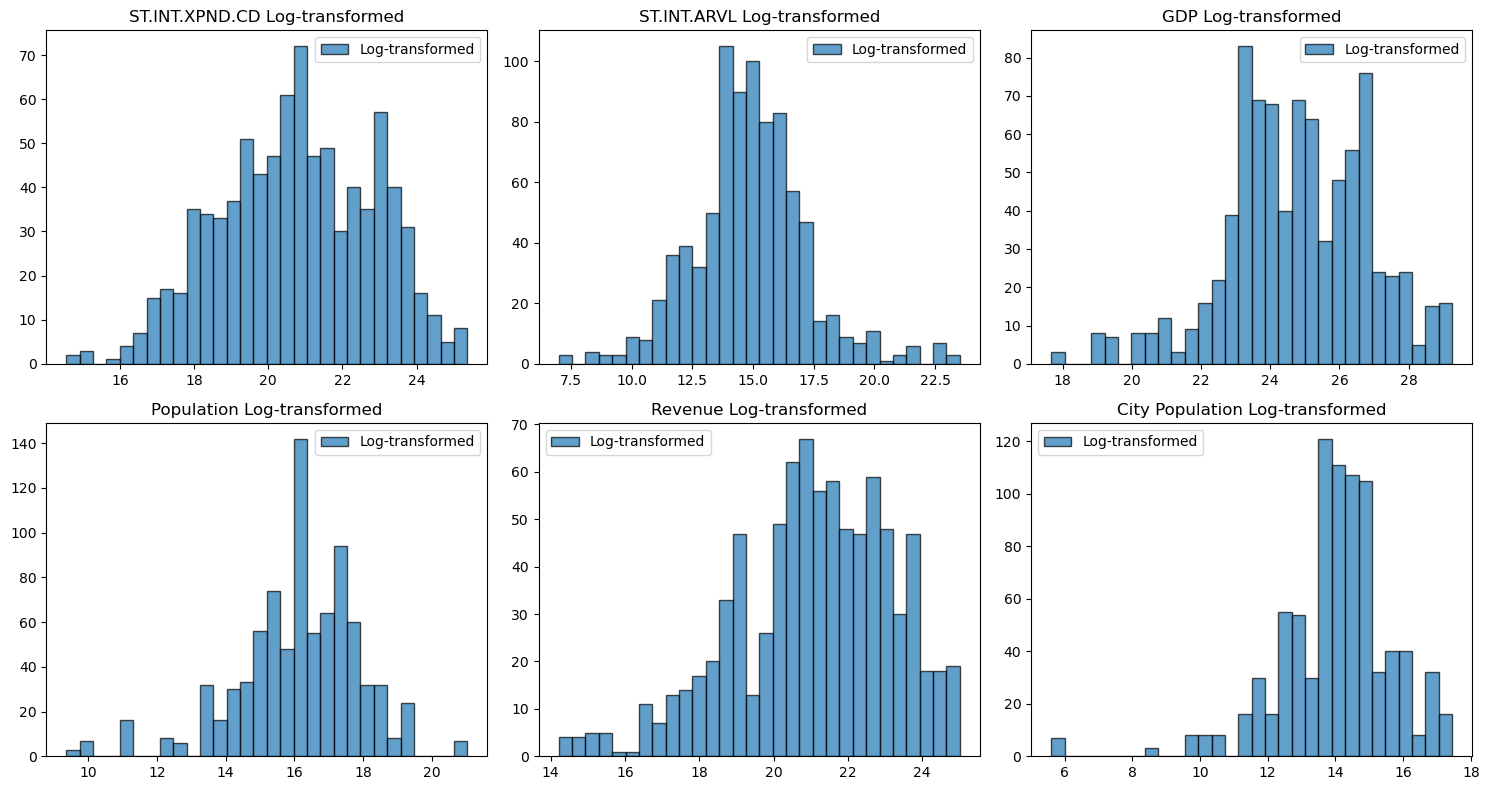

In [55]:
plt.figure(figsize=(15, 8))
for i, column_name in enumerate(column_names):
    plt.subplot(2, 3, i + 1)
    #plt.hist(df_modified[column_name], bins=30, edgecolor='k', alpha=0.7, label='Original')
    plt.hist(df_modified[column_name + '_log'], bins=30, edgecolor='k', alpha=0.7, label='Log-transformed')
    plt.title(f'{column_name} Log-transformed')
    plt.legend()

plt.tight_layout()
plt.show()

In [56]:
df_modified.head()

,Country,Year,ST.INT.XPND.CD,ST.INT.ARVL,Density\n(P/Km2),Capital/Major City,Gasoline Price,GDP,Largest city,Population,Urban_population,Revenue,City Population,ST.INT.XPND.CD_log,ST.INT.ARVL_log,GDP_log,Population_log,Revenue_log,City Population_log
0,Afghanistan,2011,255000000.0,154875000.0,60.0,Kabul,0.7,1.910135e+10,Kabul,38041754.0,"9,797,273",165000000.0,4273156.0,19.356774,18.858129,23.673025,17.454195,18.921456,15.267863
1,Afghanistan,2012,110000000.0,154875000.0,60.0,Kabul,0.7,1.910135e+10,Kabul,38041754.0,"9,797,273",167000000.0,4273156.0,18.515991,18.858129,23.673025,17.454195,18.933504,15.267863
2,Afghanistan,2013,138000000.0,154875000.0,60.0,Kabul,0.7,1.910135e+10,Kabul,38041754.0,"9,797,273",179000000.0,4273156.0,18.742764,18.858129,23.673025,17.454195,19.002896,15.267863
3,Afghanistan,2014,140000000.0,154875000.0,60.0,Kabul,0.7,1.910135e+10,Kabul,38041754.0,"9,797,273",121000000.0,4273156.0,18.757153,18.858129,23.673025,17.454195,18.611301,15.267863
4,Afghanistan,2015,151000000.0,154875000.0,60.0,Kabul,0.7,1.910135e+10,Kabul,38041754.0,"9,797,273",86000000.0,4273156.0,18.832790,18.858129,23.673025,17.454195,18.269858,15.267863


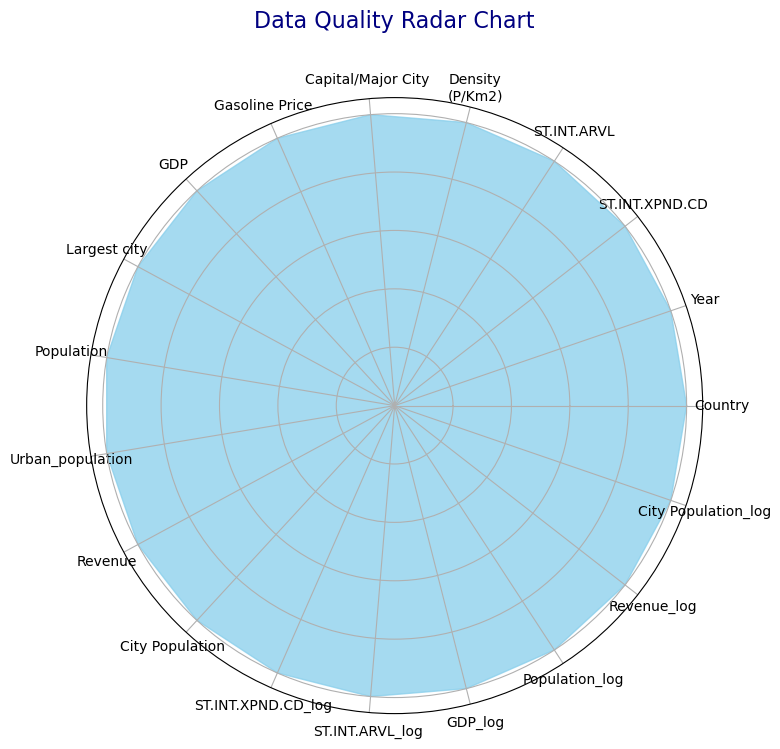

In [57]:


completeness_percentage = 100 * (1 - df_modified.isnull().sum() / len(df_modified))

# Set up categories and values for the radar chart
categories = list(completeness_percentage.index)
values = completeness_percentage.values

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))  # Closing the circle
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.75)

ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Data Quality Radar Chart', size=16, color='navy', y=1.1)
plt.show()


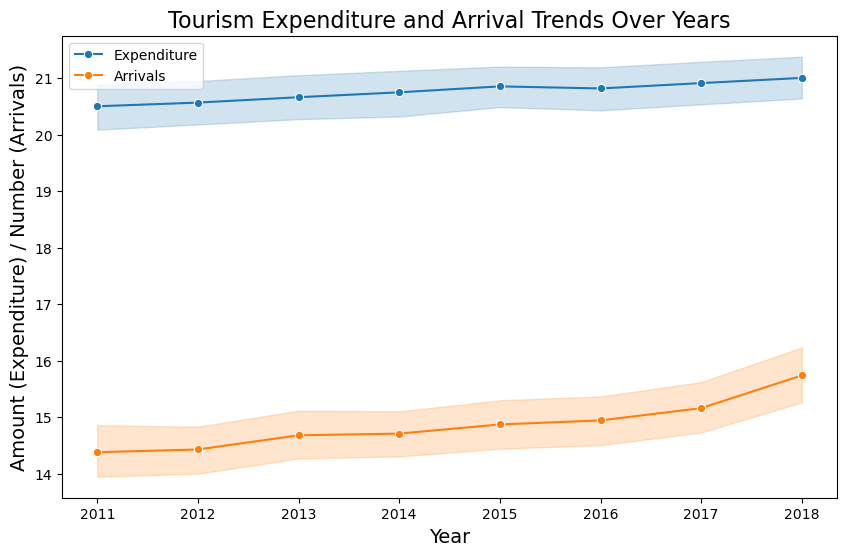

In [58]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='Year', y='ST.INT.XPND.CD_log', label='Expenditure', data=df_modified, marker='o')
sns.lineplot(x='Year', y='ST.INT.ARVL_log', label='Arrivals', data=df_modified, marker='o')

plt.title('Tourism Expenditure and Arrival Trends Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount (Expenditure) / Number (Arrivals)', fontsize=14)
plt.legend()
plt.show()

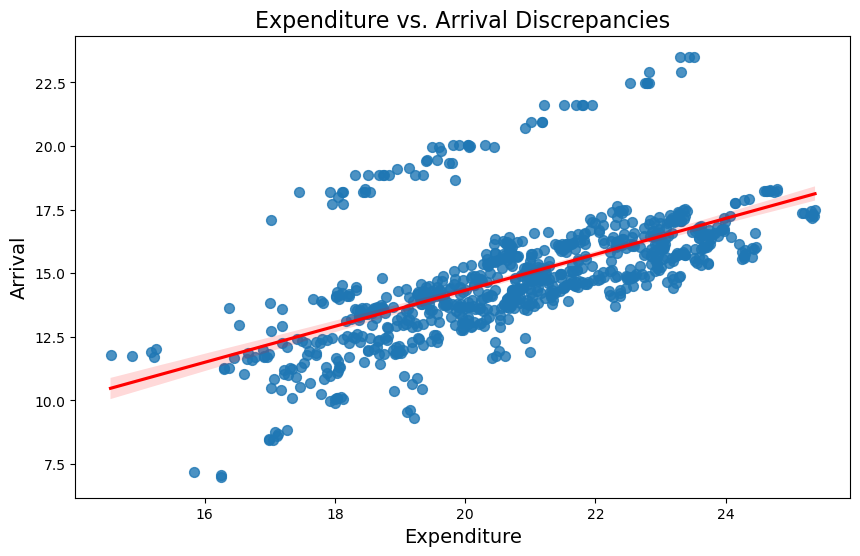

In [59]:
plt.figure(figsize=(10, 6))

sns.regplot(x='ST.INT.XPND.CD_log', y='ST.INT.ARVL_log', data=df_modified, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Expenditure vs. Arrival Discrepancies', fontsize=16)
plt.xlabel('Expenditure', fontsize=14)
plt.ylabel('Arrival', fontsize=14)
plt.show()

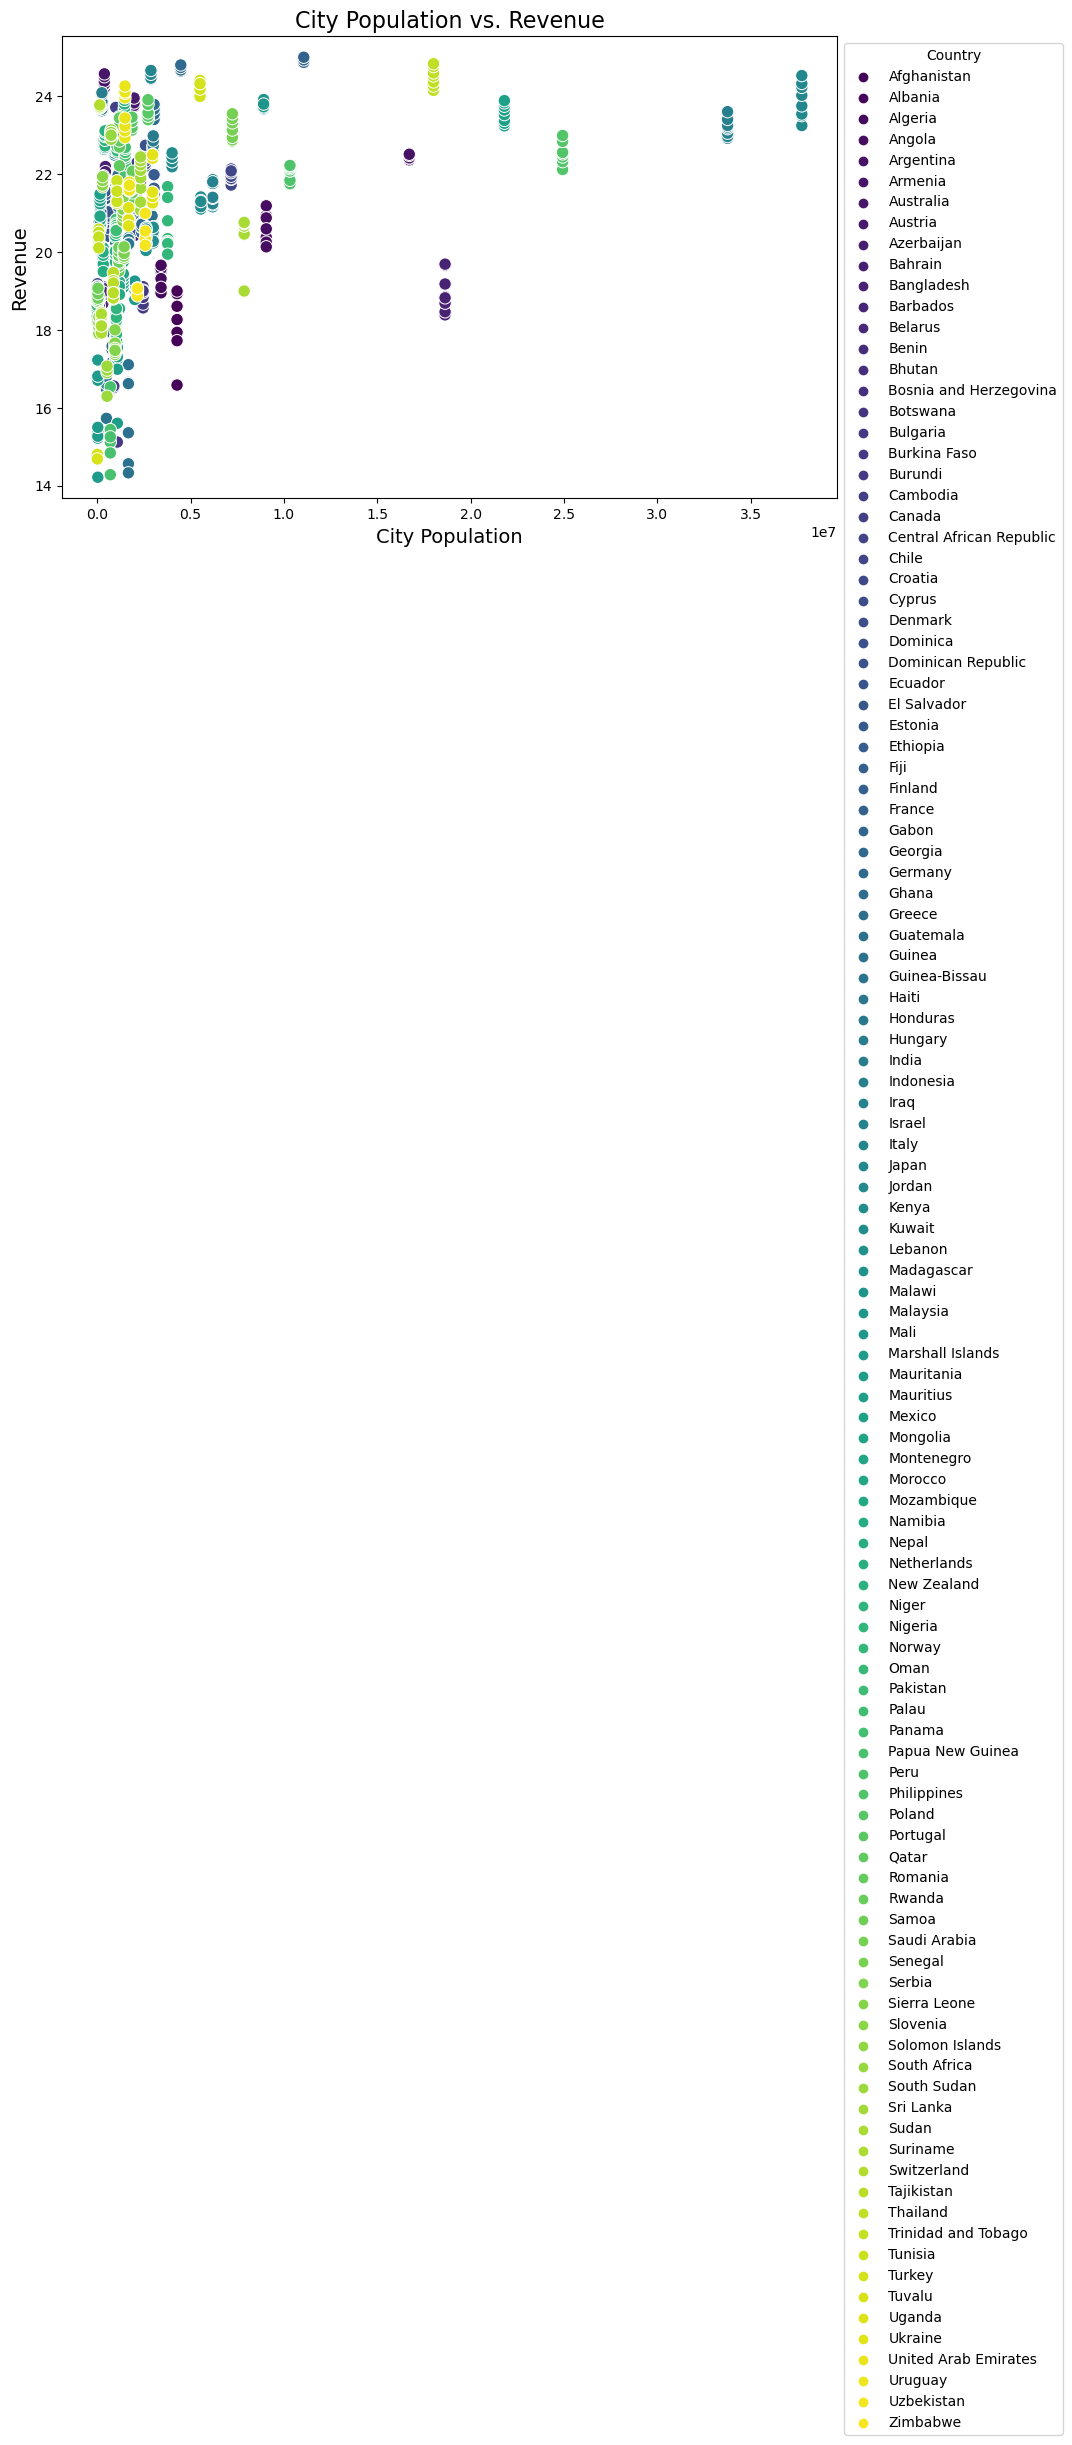

In [60]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='City Population', y='Revenue_log', data=df_modified, hue='Country', palette='viridis', s=80)
plt.title('City Population vs. Revenue', fontsize=16)
plt.xlabel('City Population', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()

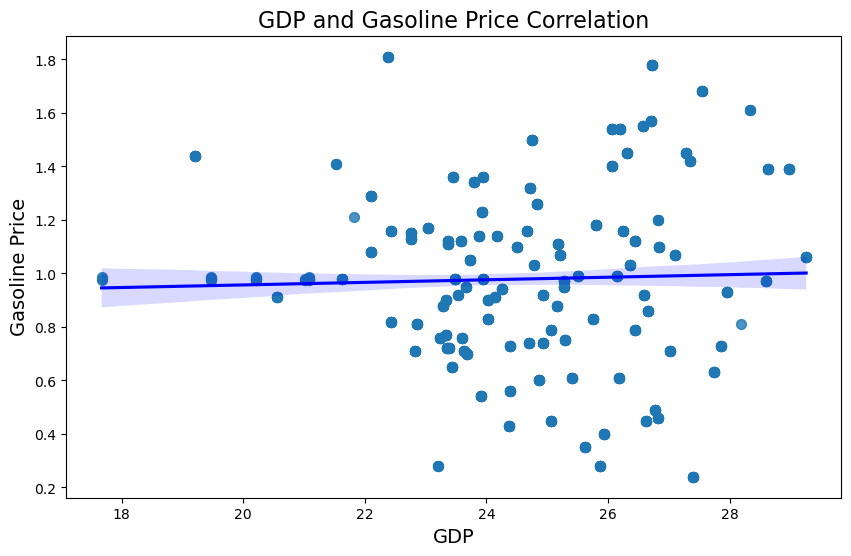

In [61]:
plt.figure(figsize=(10, 6))

sns.regplot(x='GDP_log', y='Gasoline Price', data=df_modified, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.title('GDP and Gasoline Price Correlation', fontsize=16)
plt.xlabel('GDP', fontsize=14)
plt.ylabel('Gasoline Price', fontsize=14)
plt.show()

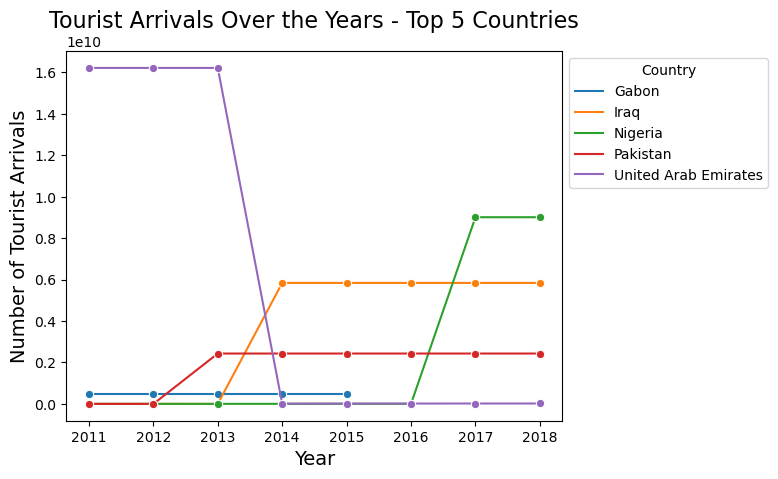

In [62]:
top_arrivals_countries = df_modified.groupby('Country')['ST.INT.ARVL'].mean().sort_values(ascending=False).head(5).index
df_top_countries = df[df['Country'].isin(top_arrivals_countries)]
sns.lineplot(x='Year', y='ST.INT.ARVL', hue='Country', data=df_top_countries, marker='o')
plt.title(f'Tourist Arrivals Over the Years - Top {5} Countries', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tourist Arrivals', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Feature Selection

In [63]:
print(len(df_modified['Country']))
print(len(df_modified['Capital/Major City']))

847
847


In [64]:
label_encoder = LabelEncoder()

# Apply label encoding to "Country" and "City" columns
df_modified['Country'] = label_encoder.fit_transform(df_modified['Country'])
df_modified['Capital/Major City'] = label_encoder.fit_transform(df_modified['Capital/Major City'])
df_modified['Largest city'] = label_encoder.fit_transform(df_modified['Largest city'])


In [65]:
df_modified.head()

,Country,Year,ST.INT.XPND.CD,ST.INT.ARVL,Density\n(P/Km2),Capital/Major City,Gasoline Price,GDP,Largest city,Population,Urban_population,Revenue,City Population,ST.INT.XPND.CD_log,ST.INT.ARVL_log,GDP_log,Population_log,Revenue_log,City Population_log
0,0,2011,255000000.0,154875000.0,60.0,45,0.7,1.910135e+10,42,38041754.0,"9,797,273",165000000.0,4273156.0,19.356774,18.858129,23.673025,17.454195,18.921456,15.267863
1,0,2012,110000000.0,154875000.0,60.0,45,0.7,1.910135e+10,42,38041754.0,"9,797,273",167000000.0,4273156.0,18.515991,18.858129,23.673025,17.454195,18.933504,15.267863
2,0,2013,138000000.0,154875000.0,60.0,45,0.7,1.910135e+10,42,38041754.0,"9,797,273",179000000.0,4273156.0,18.742764,18.858129,23.673025,17.454195,19.002896,15.267863
3,0,2014,140000000.0,154875000.0,60.0,45,0.7,1.910135e+10,42,38041754.0,"9,797,273",121000000.0,4273156.0,18.757153,18.858129,23.673025,17.454195,18.611301,15.267863
4,0,2015,151000000.0,154875000.0,60.0,45,0.7,1.910135e+10,42,38041754.0,"9,797,273",86000000.0,4273156.0,18.832790,18.858129,23.673025,17.454195,18.269858,15.267863


In [66]:
numeric_columns = ['ST.INT.XPND.CD', 'ST.INT.ARVL', 'Density\n(P/Km2)', 'Gasoline Price', 'GDP', 'Population', 'Urban_population', 'Revenue', 'City Population']
df_modified[numeric_columns] = df_modified[numeric_columns].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

# Check for missing values after conversion
print(df_modified[numeric_columns].isna().sum())

ST.INT.XPND.CD      0
ST.INT.ARVL         0
Density\n(P/Km2)    0
Gasoline Price      0
GDP                 0
Population          0
Urban_population    0
Revenue             0
City Population     0
dtype: int64


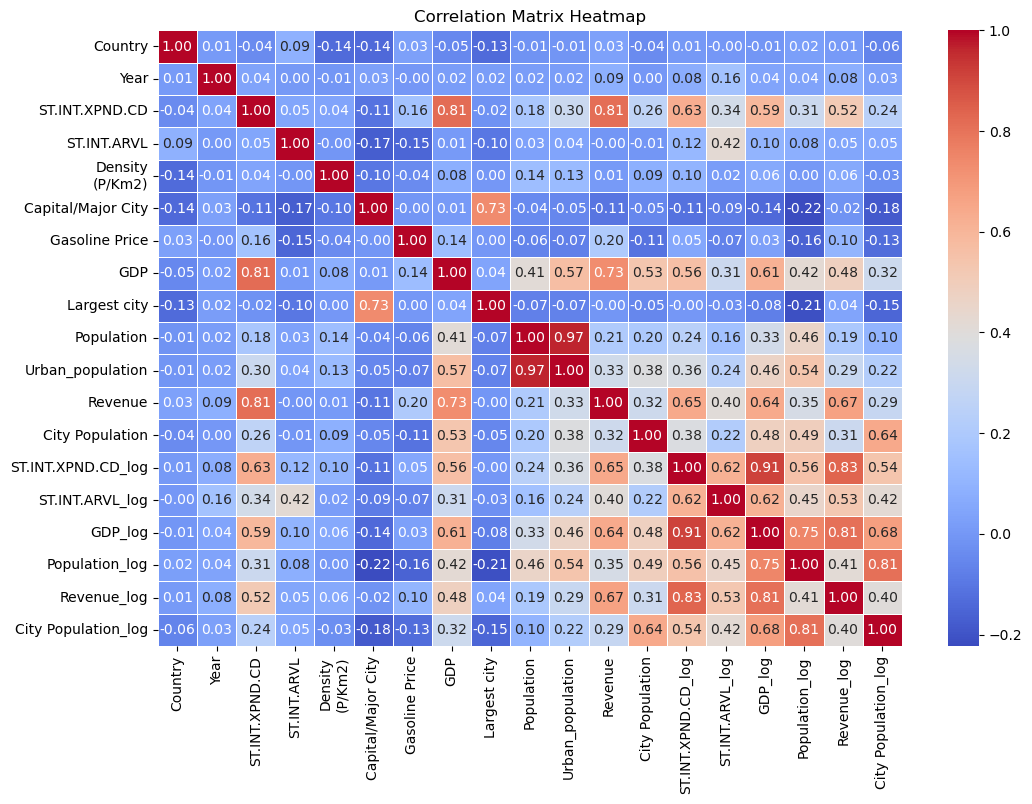

In [67]:

correlation_matrix =df_modified.corr()
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [68]:
df_modified.columns

Index(['Country', 'Year', 'ST.INT.XPND.CD', 'ST.INT.ARVL', 'Density\n(P/Km2)',
       'Capital/Major City', 'Gasoline Price', 'GDP', 'Largest city',
       'Population', 'Urban_population', 'Revenue', 'City Population',
       'ST.INT.XPND.CD_log', 'ST.INT.ARVL_log', 'GDP_log', 'Population_log',
       'Revenue_log', 'City Population_log'],
      dtype='object')

In [69]:
columns_new=['Country', 'Year', 'Density\n(P/Km2)', 'Capital/Major City', 'Gasoline Price', 'Largest city','ST.INT.XPND.CD_log', 'ST.INT.ARVL_log', 'GDP_log', 'Population_log','Revenue_log', 'City Population_log']  
df_copy=df_modified[columns_new]
df_copy.columns

Index(['Country', 'Year', 'Density\n(P/Km2)', 'Capital/Major City',
       'Gasoline Price', 'Largest city', 'ST.INT.XPND.CD_log',
       'ST.INT.ARVL_log', 'GDP_log', 'Population_log', 'Revenue_log',
       'City Population_log'],
      dtype='object')

In [70]:
X = df_copy.drop(['ST.INT.ARVL_log'], axis=1)
y= df_copy[['ST.INT.ARVL_log']]

X_train ,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (677, 11)
X_test shape: (170, 11)
y_train shape: (677, 1)
y_test shape: (170, 1)


In [71]:
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
model = LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [73]:
y_pred = model.predict(X_test)

In [74]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.0592357098100518


In [75]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model on the training data
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_predict = rf_model.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [76]:
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.1445817834656251


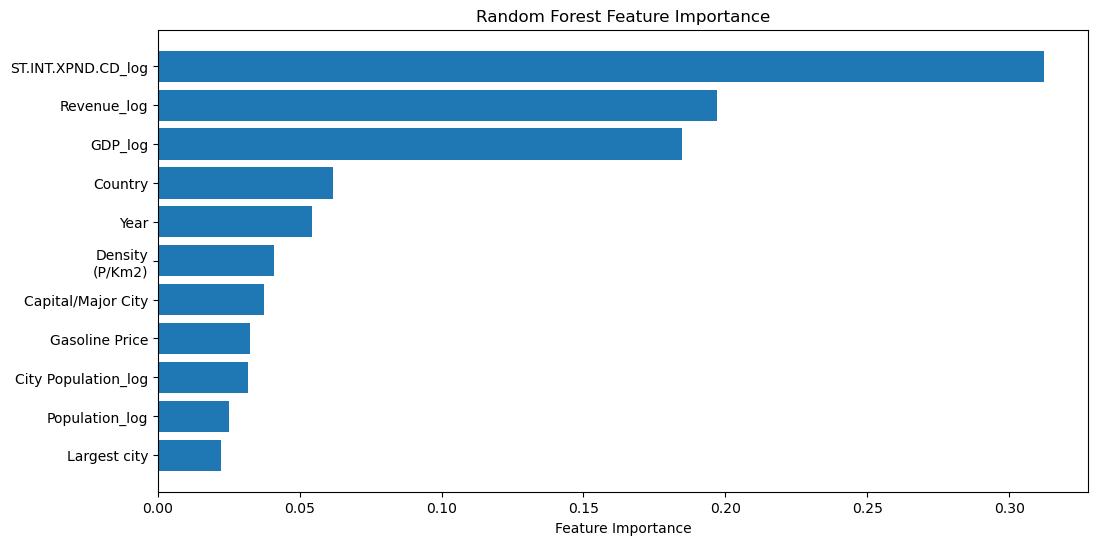

In [77]:
plt.figure(figsize=(12, 6))
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


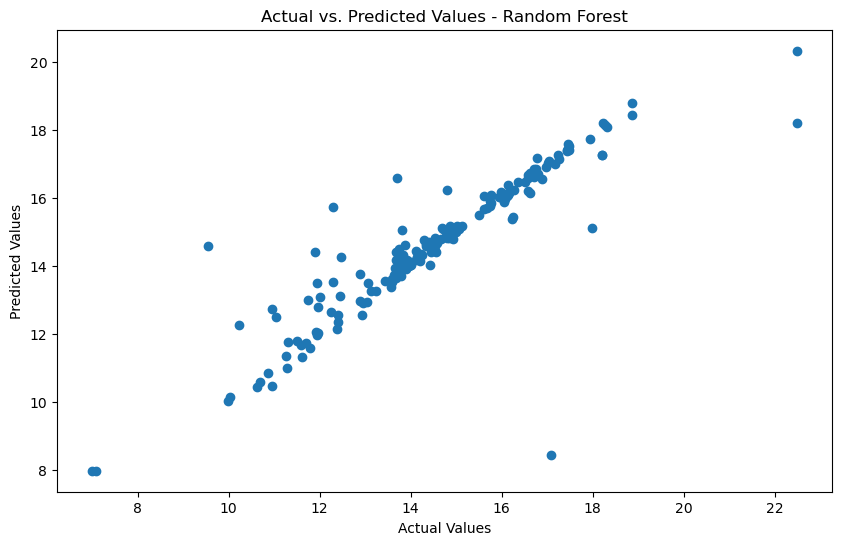

In [78]:
#Create a scatter plot to compare the actual target values against the predicted values. 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Random Forest')
plt.show()


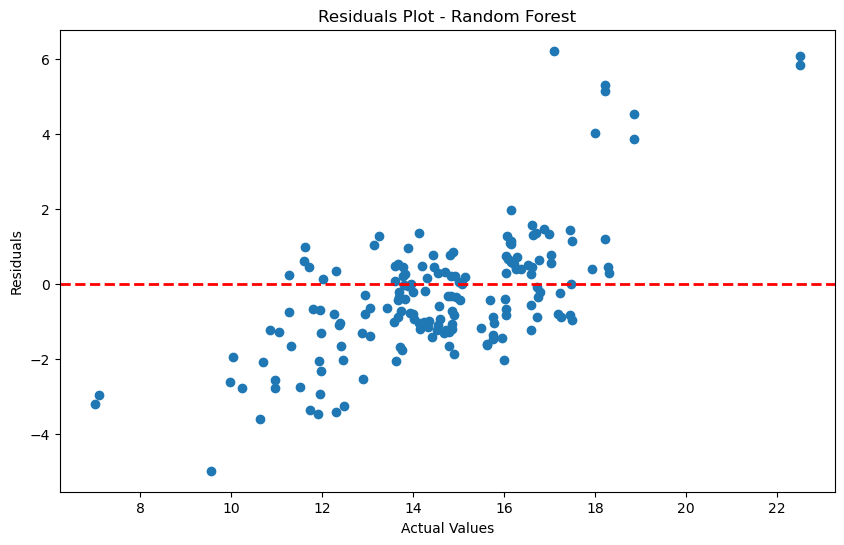

In [79]:
#Plot the residuals (the differences between actual and predicted values) to check for patterns or trends. 
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Random Forest')
plt.show()


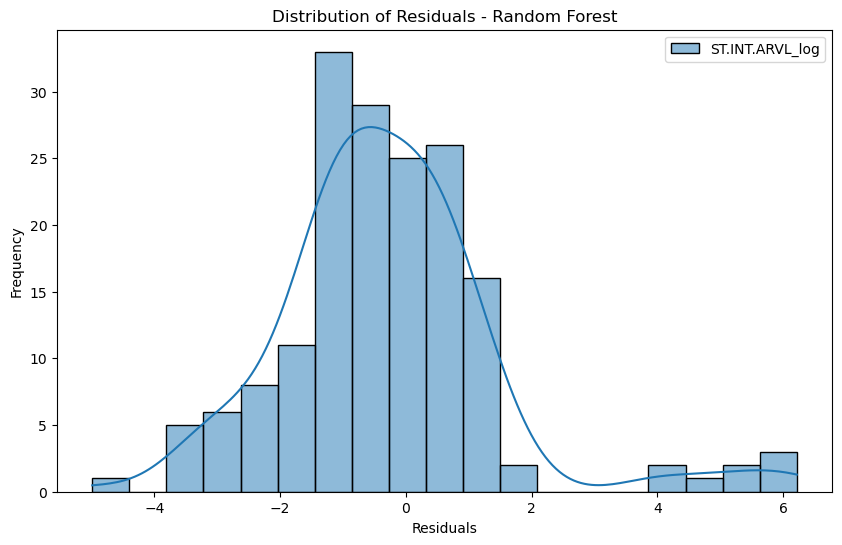

In [80]:
#Create a histogram or kernel density plot to visualize the distribution of residuals. 
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals - Random Forest')
plt.show()
